In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
data=[]
label=[]
np.random.seed(0)


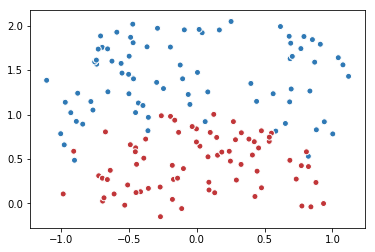

In [4]:
#以原点为圆心，半径为1的圆把散点划分为红蓝两部分，并加入随机噪声
for i in range(150):
    x1=np.random.uniform(-1,1)
    x2=np.random.uniform(0,2)
    if(x1**2+x2**2<=1):
        data.append([np.random.normal(x1,0.1),np.random.normal(x2,0.1)])
        label.append(0)
    else:
        data.append([np.random.normal(x1, 0.1), np.random.normal(x2, 0.1)])
        label.append(1)
    

data = np.hstack(data).reshape(-1,2)
label = np.hstack(label).reshape(-1, 1)
plt.scatter(data[:,0], data[:,1], c=label,
           cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white")
plt.show()

After 0 steps,mse_loss:0.965407
After 2000 steps,mse_loss:0.040621
After 4000 steps,mse_loss:0.032673
After 6000 steps,mse_loss:0.027530
After 8000 steps,mse_loss:0.024807
After 10000 steps,mse_loss:0.022874
After 12000 steps,mse_loss:0.021198
After 14000 steps,mse_loss:0.020258
After 16000 steps,mse_loss:0.019658
After 18000 steps,mse_loss:0.019205
After 20000 steps,mse_loss:0.018927
After 22000 steps,mse_loss:0.018509
After 24000 steps,mse_loss:0.018209
After 26000 steps,mse_loss:0.017932
After 28000 steps,mse_loss:0.017632
After 30000 steps,mse_loss:0.017368
After 32000 steps,mse_loss:0.017125
After 34000 steps,mse_loss:0.016904
After 36000 steps,mse_loss:0.016702
After 38000 steps,mse_loss:0.016513


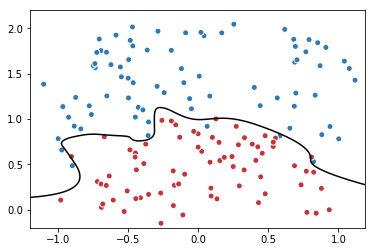

In [7]:
#定义一个获得权重，并自动加入正则项到损失的函数
def get_weight(shape,lambda1):
    var=tf.Variable(tf.random_normal(shape),dtype=tf.float32)
    tf.add_to_collection('losses',tf.contrib.layers.l2_regularizer(lambda1)(var))
    return var

#定义神经网络
x=tf.placeholder(tf.float32,shape=(None,2))
y_=tf.placeholder(tf.float32,shape=(None,1))
sample_size=len(data)
#sample_size
#每层节点的个数
layer_dimension=[2,10,5,3,1]
n_layers=len(layer_dimension)
cur_layer=x
in_dimension=layer_dimension[0]
#循环生成神经网络结构
for i in range(1,n_layers):
    out_dimension=layer_dimension[i]
    weight=get_weight([in_dimension,out_dimension],0.003)
    bias=tf.Variable(tf.constant(0.1,shape=[out_dimension]))
    cur_layer=tf.nn.elu(tf.matmul(cur_layer,weight)+bias)
    in_dimension=layer_dimension[i]
y=cur_layer

#损失函数的定义
mse_loss=tf.reduce_sum(tf.pow(y_-y,2))/sample_size
tf.add_to_collection("losses",mse_loss)
loss=tf.add_n(tf.get_collection('losses'))
train_op=tf.train.AdamOptimizer(0.001).minimize(mse_loss)
training_step=40000
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for i in range(training_step):
        sess.run(train_op,feed_dict={x:data,y_:label})
        if(i%2000==0):
            print("After %d steps,mse_loss:%f"%(i,sess.run(mse_loss,feed_dict={x:data,y_:label})))
             # 画出训练后的分割曲线
    xx, yy = np.mgrid[-1.2:1.2:.01, -0.2:2.2:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = sess.run(y, feed_dict={x:grid})
    probs = probs.reshape(xx.shape)

plt.scatter(data[:,0], data[:,1], c=label,
           cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white")
plt.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.1)
plt.show()